____    
    
**Проект: Обучение с учителем: качество модели**
_____
**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику, продукты.

Активность покупателей начала снижаться, привлечение новых не так эффективно (о магазине знает большая часть целевой аудитории).

Возможный выход — удерживать активность постоянных клиентов с помощью персонализированных предложений.

«В один клик» — хочет принимать решения на основе анализа данных и бизнес-моделирования.
_____
**Цель проекта.**
    
Необъодимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи проекта.**

- Промаркировать уровень финансовой активности постоянных покупателей.
В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

- Собрать данные по клиентам по следующим группам:
-- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
-- Признаки, которые описывают продуктовое поведение покупателя (какие товары покупает и как часто).
-- Признаки, которые описывают покупательское поведение клиента (сколько тратил в магазине).
-- Признаки, которые описывают поведение покупателя на сайте (как много страниц просматривает и сколько времени проводит на сайте).

- Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца, включив данные фин департамента о прибыльности клиента (доход с каждого покупателя за последние три месяца).

- Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.
______

**Исходные данные.**

- Файл *market_file.csv*, содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- Файл *market_money.csv*, данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- Файл *market_time.csv*, таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- Файл *money.csv*, данныме о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
____
**Содержание проекта.**

***Шаг 1. Загрузка данных:***
* [Загрузка библиотек.](#1-bullet)
* [Изученеие файлов с данными, получение общей информации.](#2-bullet)

***Шаг 2. Предобработка данных:***
* [Переименование стлбцов.](#3-bullet)
* [Поиск и устранение дублей.](#4-bullet)

***Шаг 3. Исследовательский анализ данных:***

***Шаг 4. Объединение таблиц***

***Шаг 5. Корреляционный анализ***
* [Гистограмма и ящик для количественных данных](#10-bullet)
* [Оценка категориальных значений](#11-bullet)
* [Построение корреляционной матрицы](#5-bullet)
* [Построение классовой корреляционной матрицы](#6-bullet)

***Шаг 6. Использование пайплайнов***
* [Выбор метрик](#9-bullet)
* [Оценка обученных моделей](#7-bullet)

***Шаг 7. Анализ важности признаков***
* [Построение *Shape* графиков](#8-bullet)

***Шаг 8. Сегментация покупателей***
* [Фильтрация](#12-bullet)
* [Визуализация и выводы](#13-bullet)

***Шаг 9. Общий вывод***


##Шаг 1. Загрузка данных:

### Загрузка библиотек
<a id='1-bullet'></a>

In [1]:
#Установка нужных бибилотек
import sys
!"{sys.executable}" -m pip install phik -q
!"{sys.executable}" -m pip install shap -q

#Импорты базовых бибоиртек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

from scipy import stats

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, r2_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from warnings import simplefilter

from phik import phik_matrix
from phik.report import plot_correlation_matrix


In [2]:
simplefilter(action='ignore', category=FutureWarning)

### Изученеие файлов с данными, получение общей информации
<a id='2-bullet'></a>

In [3]:
try:
    df_file = pd.read_csv('/content/market_file.csv', sep=',')
    df_mk_money = pd.read_csv('/content/market_money.csv', sep=',')
    df_time = pd.read_csv('/content/market_time.csv', sep=',')
    df_money = pd.read_csv('/content/money.csv', sep=';', decimal = ',')
except:
    df_file = pd.read_csv('/datasets/market_file.csv', sep=',')
    df_mk_money = pd.read_csv('/datasets/market_money.csv', sep=',')
    df_time = pd.read_csv('/datasets/market_time.csv', sep=',')
    df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

display(df_file.info())
display(df_mk_money.info())
display(df_time.info())
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


# Шаг 2. Предобработка данных

### Переименование столцов
<a id='3-bullet'></a>

In [4]:
#Список датафреймов для предобработки
prepr_list = [df_file, df_mk_money, df_time, df_money]

#Функция для приведения названий столбцов к "змеиному" стилю
def repl_df(dfs):
    for i, df in enumerate(dfs):
        dfs[i] = df.rename(columns=lambda x: x.replace(' ', '_').lower(), inplace=True)
    return dfs

#Переименование
repl_df(prepr_list);

### Поиск и устранение дублей
<a id='4-bullet'></a>

In [5]:
#Функция для отбора категорий в списки
def select_type_list(df, column_type):
    return df.select_dtypes(include=column_type).columns.tolist()

#Создание списка категориальных столбцов
categorical_trait = select_type_list(df_file, ['object'])

#Функция по поиску дублей
def search_duplicates(df, categorical_traits):
    print('Количество дубликатов в столбцах:')
    display(df.apply(lambda col: col.duplicated().sum()))

    print('Количество дубликатов в строках:')
    display(df.duplicated().sum())

    for trait in categorical_traits:
        print(f"Уникальные значения для {trait}: {df[trait].unique()}")

search_duplicates(df_file, categorical_trait)

#Переименую неявные дубли
df_file['тип_сервиса'] = df_file['тип_сервиса'].replace('стандартт', 'стандарт')
df_time['период'] = df_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц_time')

Количество дубликатов в столбцах:


id                                        0
покупательская_активность              1298
тип_сервиса                            1297
разрешить_сообщать                     1298
маркет_актив_6_мес                     1259
маркет_актив_тек_мес                   1297
длительность                            642
акционные_покупки                      1258
популярная_категория                   1294
средний_просмотр_категорий_за_визит    1294
неоплаченные_продукты_штук_квартал     1289
ошибка_сервиса                         1290
страниц_за_визит                       1280
dtype: int64

Количество дубликатов в строках:


0

Уникальные значения для покупательская_активность: ['Снизилась' 'Прежний уровень']
Уникальные значения для тип_сервиса: ['премиум' 'стандартт' 'стандарт']
Уникальные значения для разрешить_сообщать: ['да' 'нет']
Уникальные значения для популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


<b>Комментарий к дублям</b>

Строки не дублируются, а дубли присутствующие в столбцах уместны, неявные дубли устранил

# Шаг 3. Исследовательский анализ данных

In [6]:
#Переменная фильтр
active_buyers = df_mk_money[df_mk_money['выручка'] > 0]
display(len(active_buyers))

#Проверка покупателей
inactive_buyers = df_mk_money[df_mk_money['выручка'] == 0]
display(inactive_buyers)

#Подтверждение актуальности всех покупателей датафрейма
inactive_buyers_check = df_mk_money[df_mk_money['id'] == 215348]
inactive_buyers_check

3894

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


<b>Комментарий к исследовательскому анализу данных</b>

О покупке в последние 3 месяца с уверенностью можно сказать только по данным таблицы о выручке (*df_mk_money*)

В ней изначально 3900 строк, фильтрация, вывод неактивных покупателей и проверка дают понять, что все клиенты таблицы *df_mk_money* подходят по критерию покупательской ативности в последние 3 месяца

# Шаг 4. Объединение таблиц

In [7]:
#Создаю переменные для разбивки на категории периода
df_mk_money_pivoted = df_mk_money.pivot(index='id', columns='период', values='выручка')
df_time_pivoted = df_time.pivot(index='id', columns='период', values='минут')

#Обновление индексов
df_mk_money_pivoted.reset_index(inplace=True)
df_time_pivoted.reset_index(inplace=True)

#Слияние датафреймов
df_full = pd.merge(df_file, df_mk_money_pivoted, on='id', suffixes=('', '_mk_money'))
df_full = pd.merge(df_full, df_time_pivoted, on='id', suffixes=('', '_time'))



In [8]:
#id неактивных покупателей
inactive_buyers_drop = inactive_buyers['id'].unique()

#Удаление неактивных покупателей
df_full = df_full[~df_full['id'].isin(inactive_buyers_drop)]

In [9]:
#Проверка
display(df_full.head(5))

df_full.shape

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц,препредыдущий_месяц,текущий_месяц,предыдущий_месяц_time,текущий_месяц_time
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


(1297, 18)

# Шаг 5. Корреляционный анализ

In [10]:
#Копия df_full
df_cluster = df_full.copy()
#Удалю столбец id
df_full.drop('id', axis=1, inplace=True)

#Фильтрация для оценки влияния признаков на каждый целевой класс
df_good = df_full[df_full['покупательская_активность'] == 'Прежний уровень']
df_bad = df_full[df_full['покупательская_активность'] == 'Снизилась']

#Создаю список интервальных значений
interval_col = select_type_list(df_full, ['int', 'float'])
#Удалю из списка id
#interval_col.remove('id')

<ipython-input-10-a45755f2ef6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.drop('id', axis=1, inplace=True)


### Гистограмма и ящик для количественных данных
<a id='10-bullet'></a>

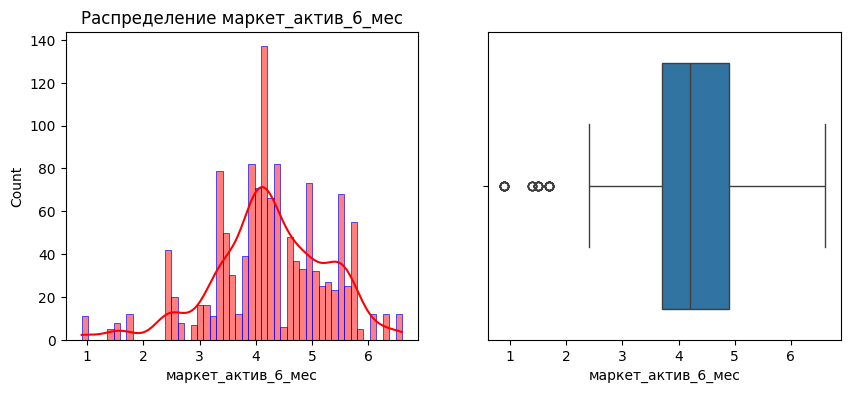

count    1297.000000
mean        4.254433
std         1.015618
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

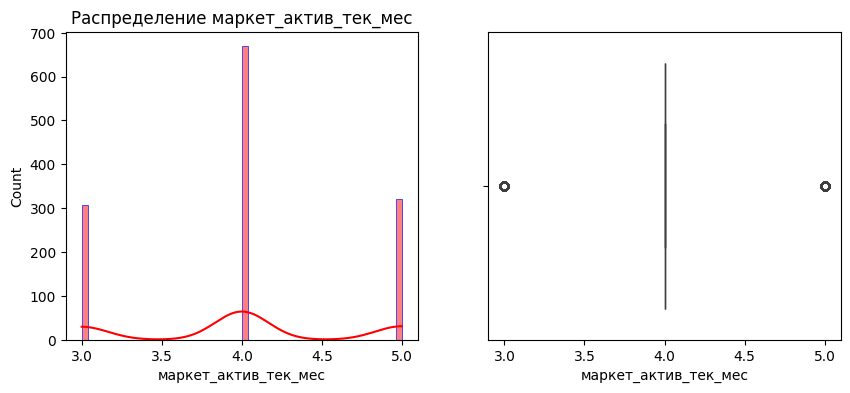

count    1297.000000
mean        4.009252
std         0.696048
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

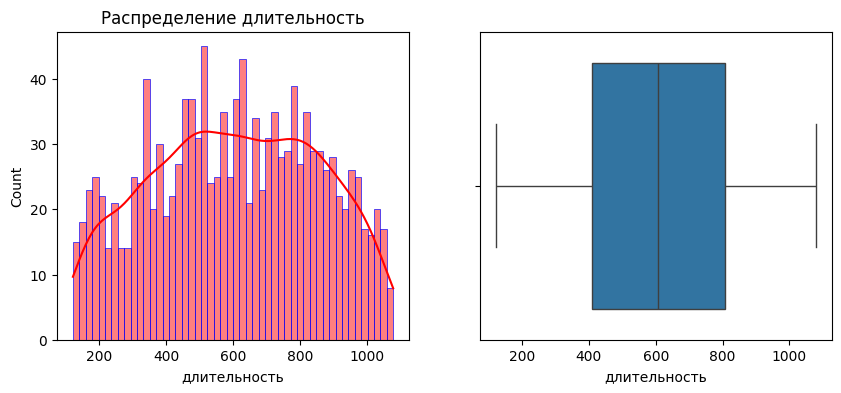

count    1297.000000
mean      602.993832
std       249.101456
min       121.000000
25%       410.000000
50%       607.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

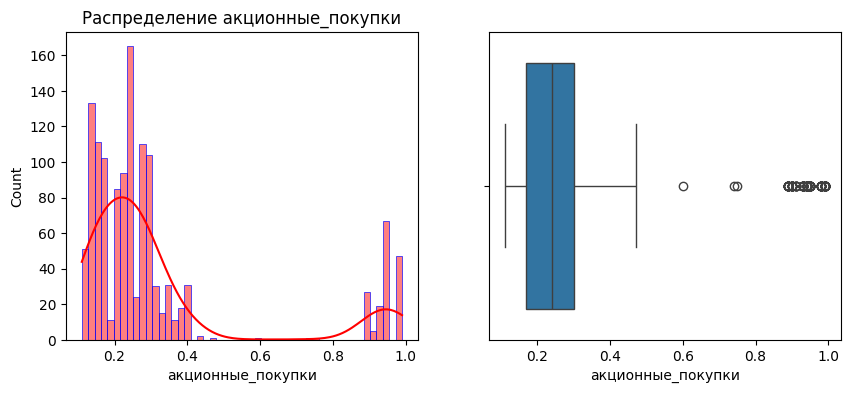

count    1297.000000
mean        0.320547
std         0.249657
min         0.110000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

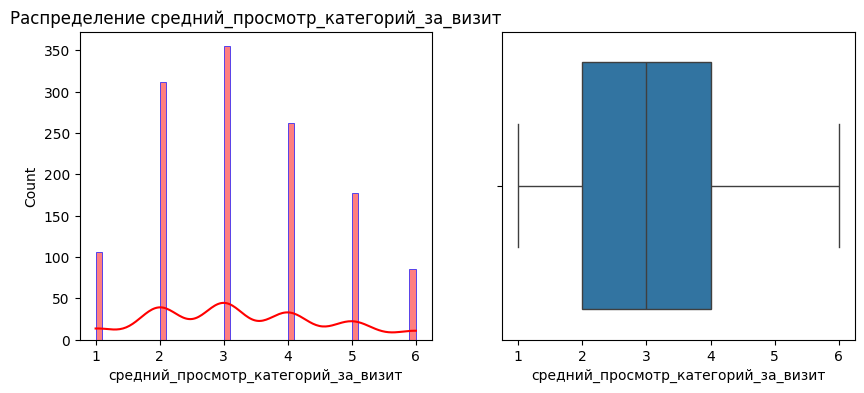

count    1297.000000
mean        3.267540
std         1.354623
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64

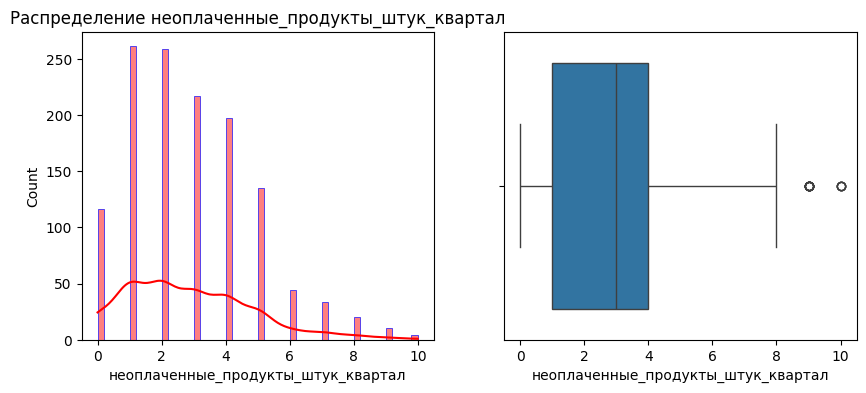

count    1297.000000
mean        2.841172
std         1.973451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

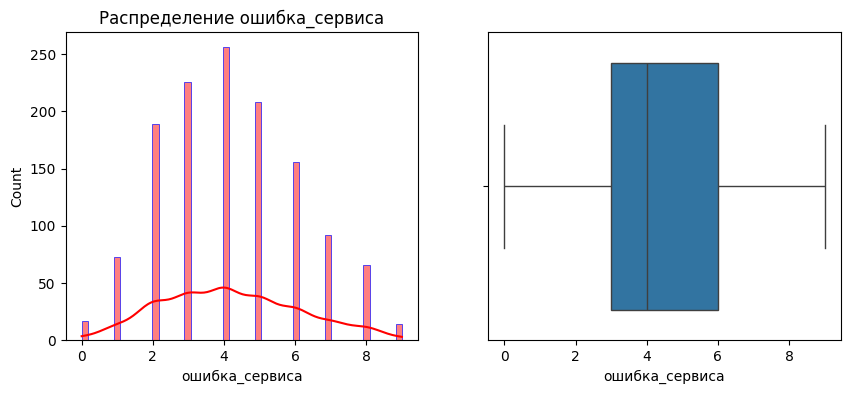

count    1297.000000
mean        4.184271
std         1.950973
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

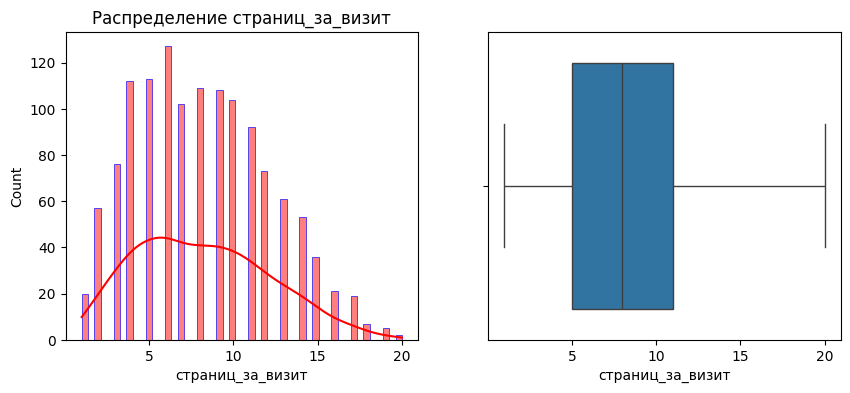

count    1297.000000
mean        8.186584
std         3.977061
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

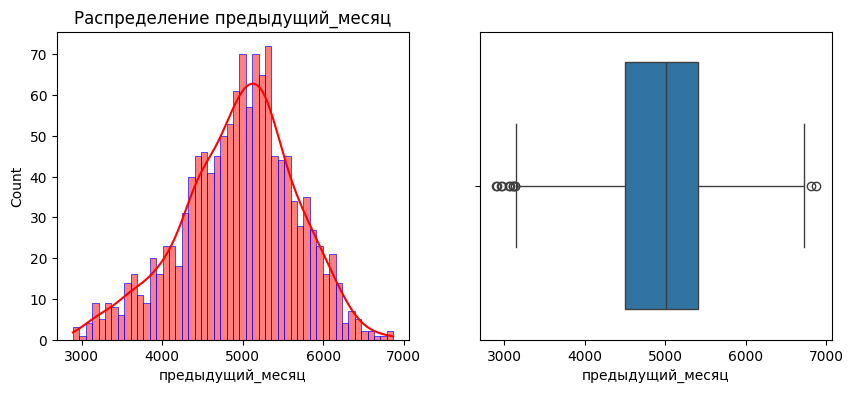

count    1297.000000
mean     4948.339630
std       701.228571
min      2890.000000
25%      4498.500000
50%      5005.500000
75%      5409.000000
max      6869.500000
Name: предыдущий_месяц, dtype: float64

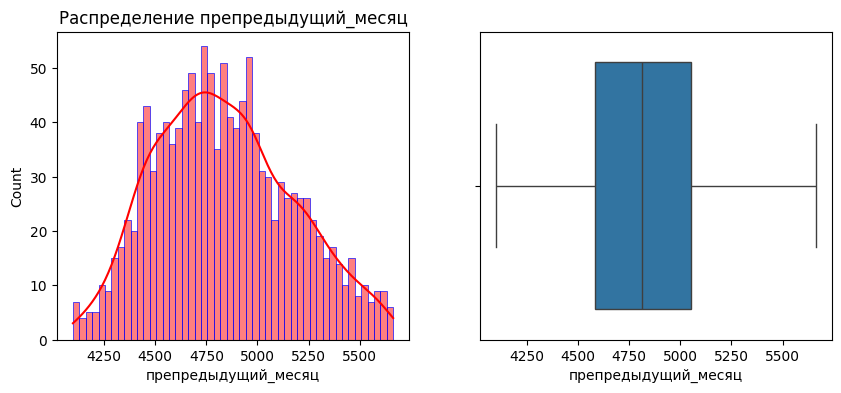

count    1297.000000
mean     4836.367772
std       333.438742
min      4098.000000
25%      4585.000000
50%      4812.000000
75%      5055.000000
max      5663.000000
Name: препредыдущий_месяц, dtype: float64

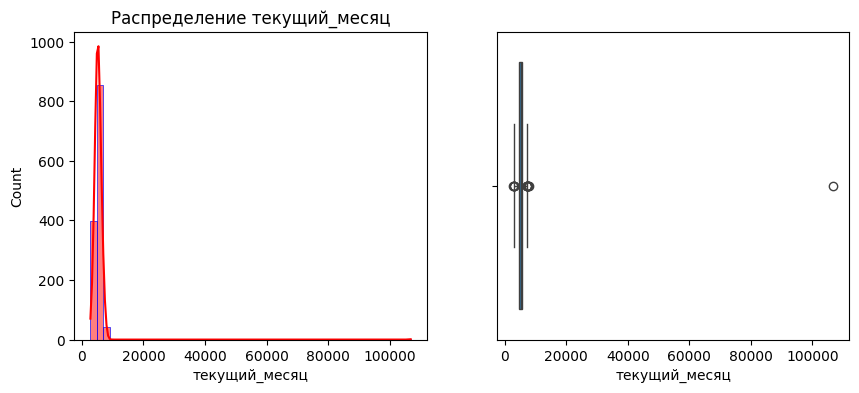

count      1297.000000
mean       5316.449268
std        2942.469139
min        2758.700000
25%        4706.600000
50%        5180.300000
75%        5761.300000
max      106862.200000
Name: текущий_месяц, dtype: float64

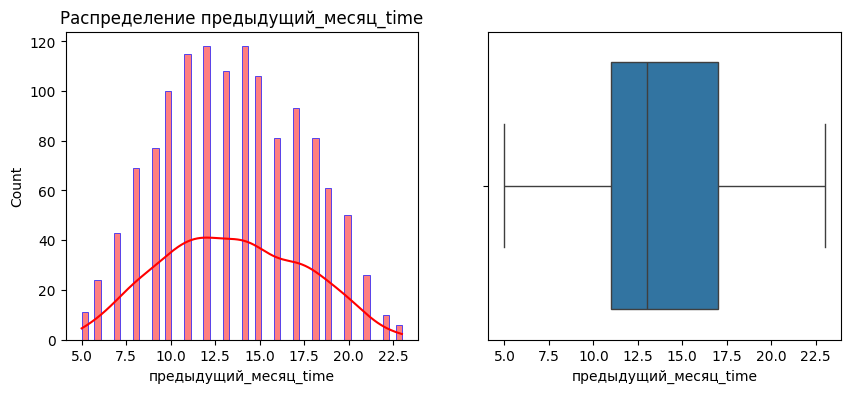

count    1297.000000
mean       13.469545
std         3.936323
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: предыдущий_месяц_time, dtype: float64

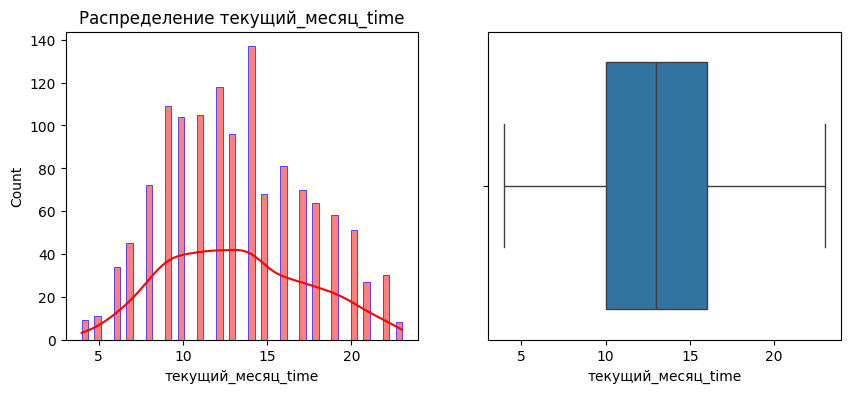

count    1297.000000
mean       13.211257
std         4.220222
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: текущий_месяц_time, dtype: float64

In [11]:
#Новая функция для визуализации количественных признаков
for sign in interval_col:
    plt.figure(figsize=(10,  4))

    #Гистограмма
    plt.subplot(1,  2,  1)  # Row  1, Column  2, Index  1
    sns.histplot(df_full[sign], kde=True, color='red', edgecolor='blue', bins=50)
    plt.title(f'Распределение {sign}')

    #Построение ящика
    plt.subplot(1,  2,  2)
    sns.boxplot(df_full[sign], orient="h")
    plt.setp(plt.gca(),  'yticklabels', [])

    plt.show()
    display(df_full[sign].describe())


In [12]:
#Словарь для сохранения результатов тестов
results = {}

#Функция по оценке нормальности распределения
for col in df_full[interval_col]:
    result = stats.shapiro(df_full[col])
    results[col] = {'statistic': result[0], 'p_value': result[1]}

#Печать результатов тста
for column, result in results.items():
    print(f'Столбеу: {column}')
    print(f"Статистика: {result['statistic']}")
    print(f"P-значение: {result['p_value']}")
    print('\n')


Столбеу: маркет_актив_6_мес
Статистика: 0.9778977632522583
P-значение: 3.334970645994806e-13


Столбеу: маркет_актив_тек_мес
Статистика: 0.8058427572250366
P-значение: 7.828221812583313e-37


Столбеу: длительность
Статистика: 0.9726889133453369
P-значение: 6.022633377390308e-15


Столбеу: акционные_покупки
Статистика: 0.6581403017044067
P-значение: 4.203895392974451e-45


Столбеу: средний_просмотр_категорий_за_визит
Статистика: 0.9305639863014221
P-значение: 4.569419995507535e-24


Столбеу: неоплаченные_продукты_штук_квартал
Статистика: 0.9329586029052734
P-значение: 1.1098016281037619e-23


Столбеу: ошибка_сервиса
Статистика: 0.9658442139625549
P-значение: 6.413092907943201e-17


Столбеу: страниц_за_визит
Статистика: 0.973970890045166
P-значение: 1.535947035519441e-14


Столбеу: предыдущий_месяц
Статистика: 0.9902087450027466
P-значение: 1.3117016806063475e-07


Столбеу: препредыдущий_месяц
Статистика: 0.9864522218704224
P-значение: 1.2515357639131253e-09


Столбеу: текущий_месяц
Стат

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Странность:</b>

Данные на графиках +- выглядят нормально (Исключая пару выбросов ("текущий месяц" и "акционные покупки")), плюс после тестирования имеют выскокую степень совместимости с нормальными показателями, но P-значение очень мало, что отвергает гипотезу о нормальности распределения данных ┐⁠(⁠‘⁠～⁠`⁠;⁠)⁠┌

</div>

### Оценка категориальных значений
<a id='11-bullet'></a>

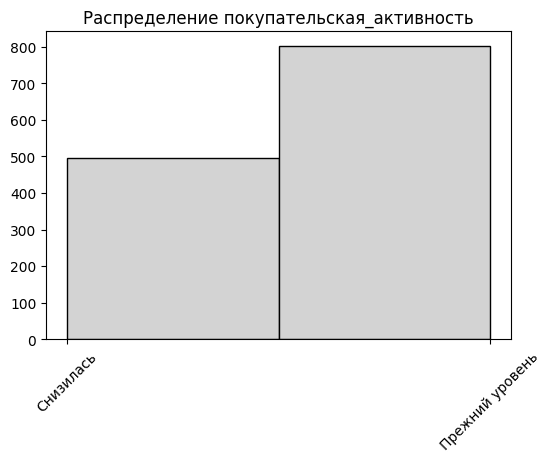

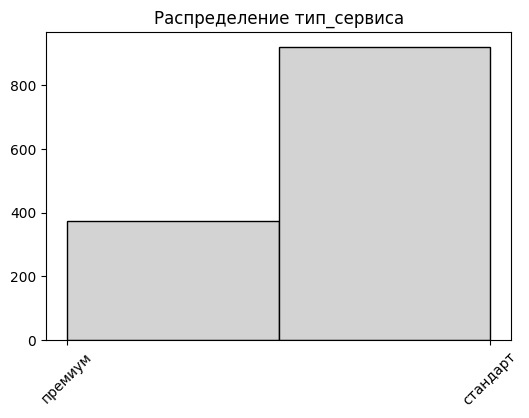

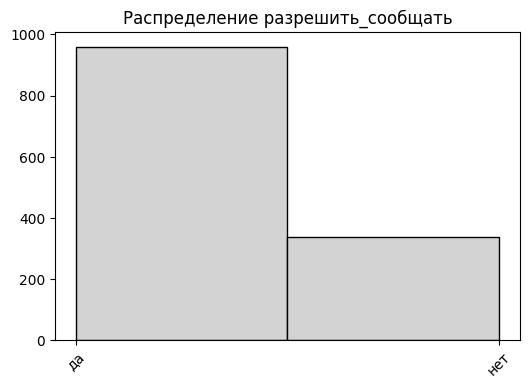

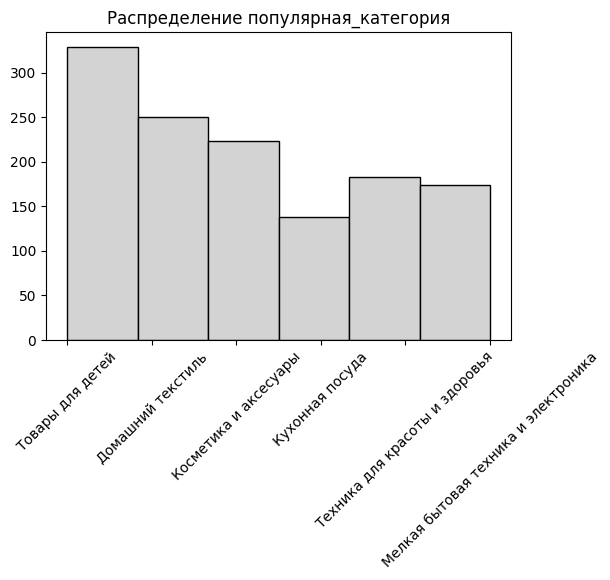

In [13]:
#Функция для визуализации категориальных значений
for sign in categorical_trait:
    unique_values = df_full[sign].unique()
    num_bins = len(unique_values)

    plt.figure(figsize=(6,  4))
    plt.hist(df_full[sign], bins=num_bins, align='mid', edgecolor='black', color='lightgray')
    plt.xticks(range(num_bins), unique_values, rotation=45)
    plt.title(f'Распределение {sign}')
    plt.show()

In [14]:
#Оценка баланса
df_full['покупательская_активность'].value_counts()

покупательская_активность
Прежний уровень    802
Снизилась          495
Name: count, dtype: int64

<b>Комментарий к оценке признаков</b>

- Явный выброс присутствует в выручке *текущего месяца*, в реальности такое возможно, но в данных эта аномалия может искажать прогнозы

- Есть пара кандидатов на перевод в категориальные значения (*маркетинговая активность текущего месяца* и *акционные покупки*), но можно и без этого  

- Категории целевого признака несбалансированны

In [15]:
df_full.shape

(1297, 17)

In [16]:
#Удаление обнаруженных выбросов
df_full = df_full.loc[df_full['текущий_месяц'] <= 100000]

In [17]:
df_full.shape

(1296, 17)

### Построение корреляционной матрицы
<a id='5-bullet'></a>

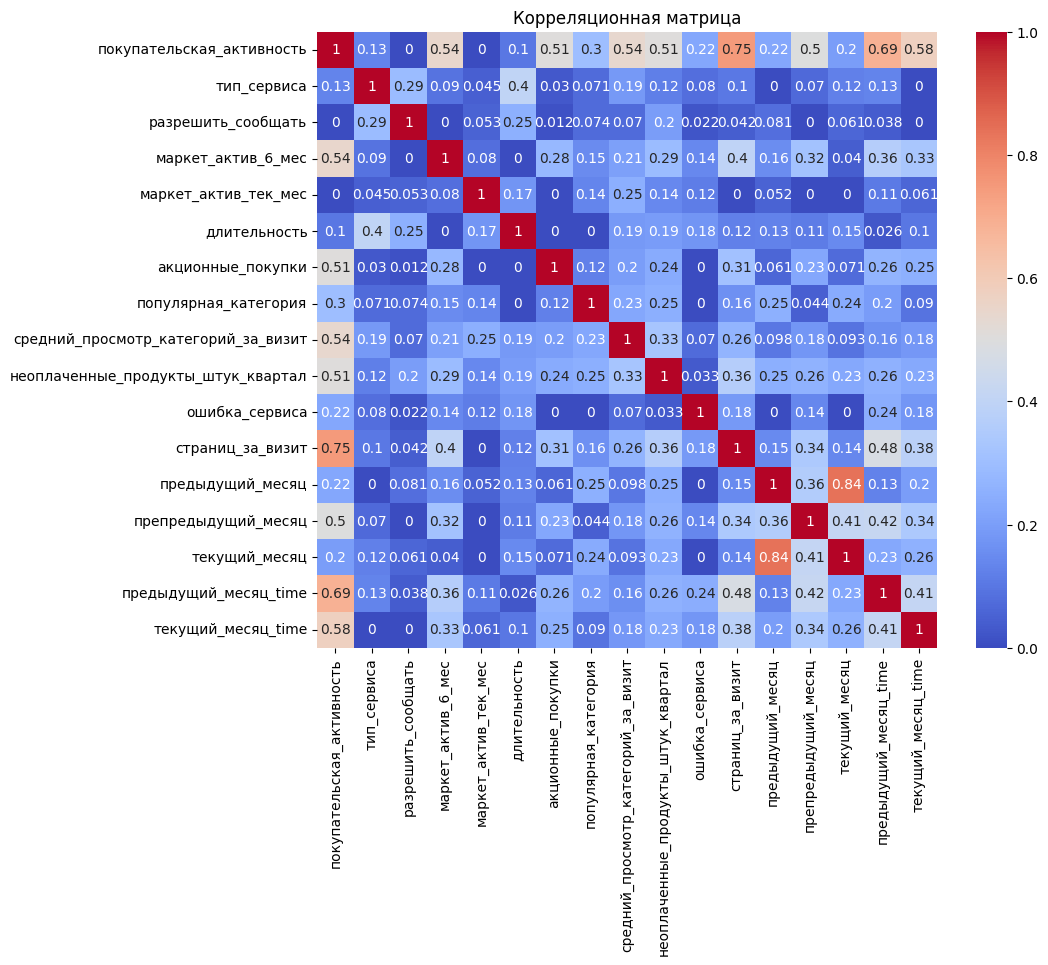

In [18]:
#Построение кор. матрицы
plt.figure(figsize=(10, 8));
sns.heatmap(df_full.phik_matrix(interval_cols=interval_col), annot=True, cmap='coolwarm');
plt.title('Корреляционная матрица');
plt.show();

<b>Комментарий к *phik* матрице</b>

- Наибольшее влияние на целевой признак оказывает количество просмотренных страниц за визит, остальные признаки в большинcтве своем имеют неплохую корреляцию с активностью покупателя


### Построение классовой корреляционной матрицы  
<a id='6-bullet'></a>

/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


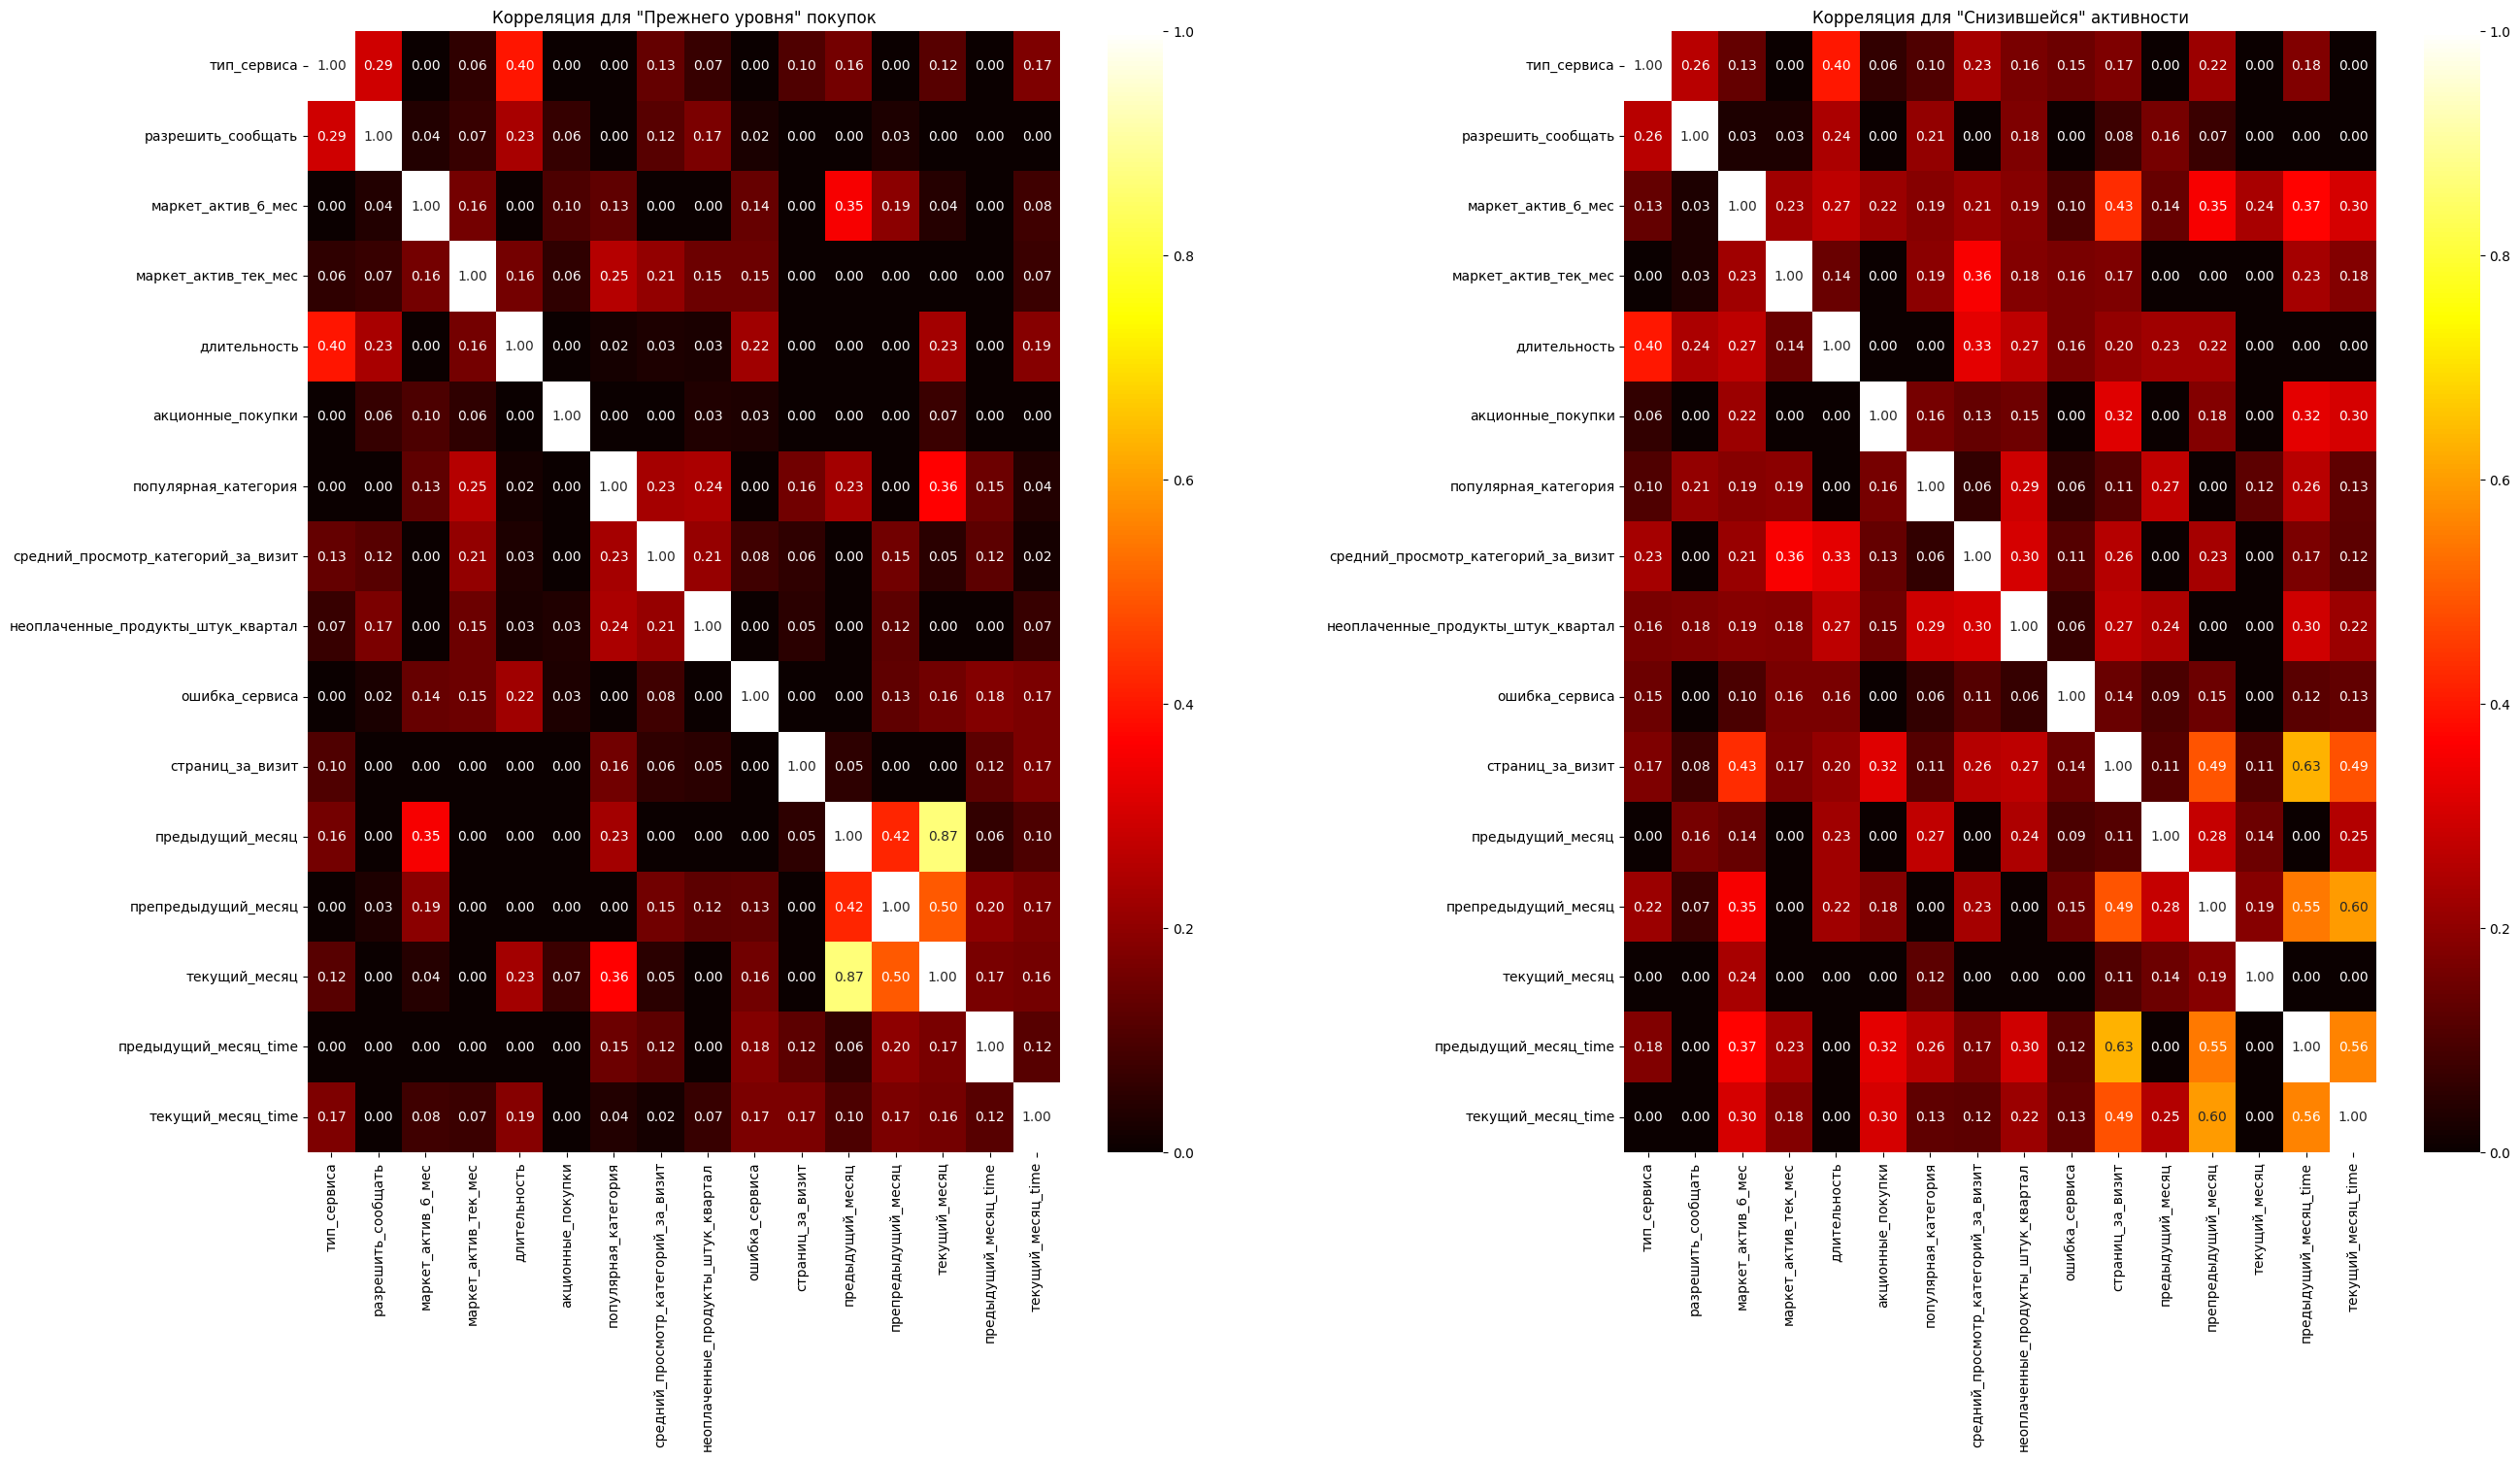

In [19]:
#Построение кор. матрицы для каждого класса целевой переменной
plt.figure(figsize=(30, 15));
plt.subplot(1, 2, 1);
sns.heatmap(df_good.phik_matrix(interval_cols=interval_col),
            cmap='hot', annot=True, fmt=".2f");
plt.title('Корреляция для "Прежнего уровня" покупок');
plt.subplot(1, 2, 2);
sns.heatmap(df_bad.phik_matrix(interval_cols=interval_col),
            cmap='hot', annot=True, fmt=".2f");
plt.title('Корреляция для "Снизившейся" активности');
plt.subplots_adjust(wspace=0.4);
plt.show();

<b>Комментарий к классовой матрице</b>

- Наибольшее влияние входные признаки оказывают на снижение покупательской активности

# Шаг 6. Использование пайплайнов

In [20]:
#Корректировка категориальных списков
categorical_trait = select_type_list(df_full, ['object'])
categorical_trait.remove('покупательская_активность')
# categorical_trait.remove('популярная_категория')

### Выбор метрик
<a id='9-bullet'></a>
<div class = "alert alert-info" style="border-left: 7px solid blue">

- Для оценки качества модели выберу метрику `ROC AUC`, важна способность модели различать классы

- Моделей и параметров много, поэтому для оптимизации времени и результата использую `RandomizedSearchCV`

</div>

In [21]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

#Разбивка данных
X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['покупательская_активность'], axis=1),
    df_full['покупательская_активность'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = df_full['покупательская_активность'])

#Списки с названиями признаков
cat_columns = categorical_trait
ord_columns = ['популярная_категория']
num_columns = interval_col

#Пайплайн для подготовки признаков из категориального списка: заполнение пропусков и OHE-кодирование
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )

#Пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['Товары для детей', 'Домашний текстиль',
                    'Косметика и аксесуары', 'Техника для красоты и здоровья',
                    'Кухонная посуда', 'Мелкая бытовая техника и электроника']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


#Общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('cat', 'encoder', cat_columns),
     ('num', 'scaler', num_columns)
    ],
    remainder='passthrough'
)

#Итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    #Словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__cat': [ord_pipe, 'passthrough']
    },

    #Словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'models__metric': ['euclidean', 'manhattan', 'minkowski'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__cat': [ohe_pipe, 'passthrough']
    },

    #Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__cat': [ohe_pipe, 'passthrough']
    },

    #Словарь для SVC модели
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__cat': [ohe_pipe, 'passthrough']
    }
]

#Случайный подбор параметров
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=6,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

#Обучение моделей
randomized_search.fit(X_train, y_train)

#Вывод лучшей модели и метрик
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict_proba(X_test)[:,  1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')



Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_акт

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.10/dist

### Оценка обученных моделей  
<a id='7-bullet'></a>

In [22]:
#Оценка всех обученных моделей
results_df = pd.DataFrame(randomized_search.cv_results_)
results_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_preprocessor__cat,param_models__n_neighbors,param_models__metric,param_models,param_models__C,...,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040283,0.017631,0.040838,0.036063,StandardScaler(),"(SimpleImputer(strategy='most_frequent'), OneH...",3,minkowski,KNeighborsClassifier(),NaN,...,"{'preprocessor__num': StandardScaler(), 'prepr...",0.895472,0.875806,0.887177,0.893065,0.860323,0.883548,0.882565,0.011828,3
1,0.030531,0.011711,0.000000,0.000000,StandardScaler(),passthrough,4,euclidean,KNeighborsClassifier(),NaN,...,"{'preprocessor__num': StandardScaler(), 'prepr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.018602,0.007072,0.000000,0.000000,MinMaxScaler(),passthrough,3,manhattan,KNeighborsClassifier(),NaN,...,"{'preprocessor__num': MinMaxScaler(), 'preproc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.024516,0.003596,0.000000,0.000000,MinMaxScaler(),passthrough,2,manhattan,KNeighborsClassifier(),NaN,...,"{'preprocessor__num': MinMaxScaler(), 'preproc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.063948,0.015129,0.027015,0.009585,StandardScaler(),"(SimpleImputer(strategy='most_frequent'), OneH...",NaN,NaN,"LogisticRegression(C=2, penalty='l1', random_s...",2,...,"{'preprocessor__num': StandardScaler(), 'prepr...",0.888005,0.921290,0.887742,0.888065,0.910323,0.883226,0.896442,0.014153,1
5,0.013592,0.010435,0.000000,0.000000,passthrough,passthrough,NaN,NaN,DecisionTreeClassifier(random_state=42),NaN,...,"{'preprocessor__num': 'passthrough', 'preproce...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,0.028962,0.008411,0.000000,0.000000,MinMaxScaler(),passthrough,2,minkowski,KNeighborsClassifier(),NaN,...,"{'preprocessor__num': MinMaxScaler(), 'preproc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,0.508729,0.118116,0.035429,0.015279,StandardScaler(),"(SimpleImputer(strategy='most_frequent'), OneH...",NaN,NaN,"SVC(probability=True, random_state=42)",NaN,...,"{'preprocessor__num': StandardScaler(), 'prepr...",0.874533,0.915000,0.905645,0.887419,0.910484,0.877097,0.895030,0.016072,2
8,0.039691,0.014279,0.000000,0.000000,StandardScaler(),passthrough,2,minkowski,KNeighborsClassifier(),NaN,...,"{'preprocessor__num': StandardScaler(), 'prepr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9,0.359168,0.053877,0.027842,0.011786,MinMaxScaler(),"(SimpleImputer(strategy='most_frequent'), OneH...",NaN,NaN,"SVC(probability=True, random_state=42)",NaN,...,"{'preprocessor__num': MinMaxScaler(), 'preproc...",0.866255,0.889839,0.883710,0.888387,0.858387,0.875161,0.876957,0.011581,4


In [23]:
#Помещаю лучшую модель в переменную
best_model = randomized_search.best_estimator_

#Переменная с предобработанными тренировочными данными
X_train_transformed = X_train
for name, transform in best_model.steps[:-1]:
    if hasattr(transform, 'transform'):
        X_test_transformed = transform.transform(X_train_transformed)

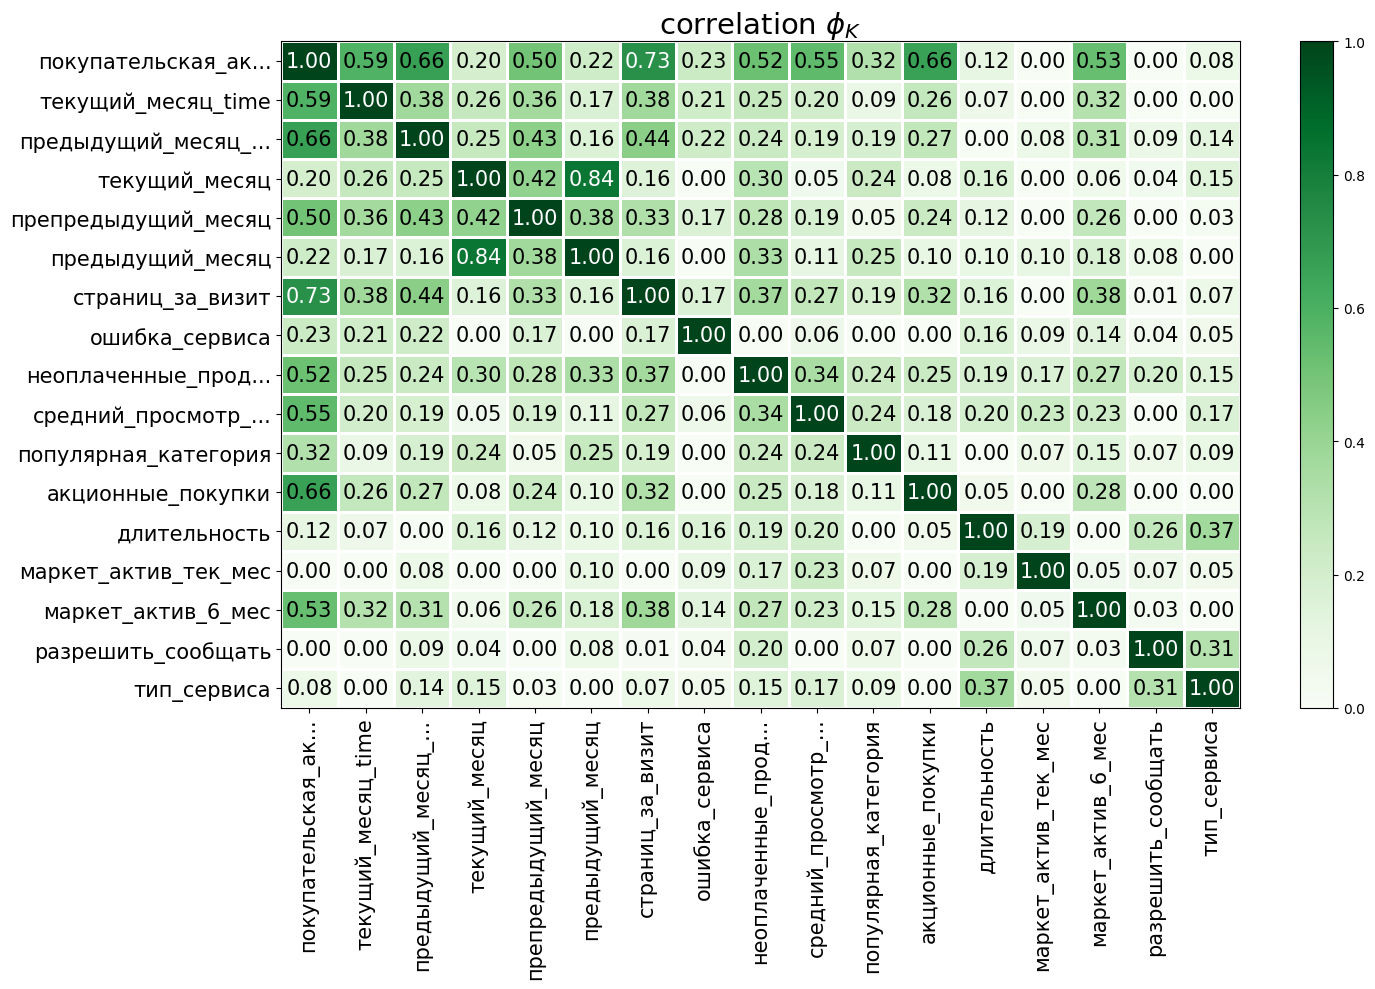

In [24]:
#Матрица для оценки корреляции на масштабиров. данных
phik_overview = phik_matrix(X_train_transformed.join(y_train), interval_cols=interval_col)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(15, 10)
)

<b>Комментарий к корреляционной матрице</b>

- Судя по матрице, связанных параметров с целевым признаком перед обучением моделей около половины

# Шаг 7. Анализ важности признаков

### Построение *Shape* графика
<a id='8-bullet'></a>

In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 813 to 322
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          324 non-null    object 
 1   разрешить_сообщать                   324 non-null    object 
 2   маркет_актив_6_мес                   324 non-null    float64
 3   маркет_актив_тек_мес                 324 non-null    int64  
 4   длительность                         324 non-null    int64  
 5   акционные_покупки                    324 non-null    float64
 6   популярная_категория                 324 non-null    object 
 7   средний_просмотр_категорий_за_визит  324 non-null    int64  
 8   неоплаченные_продукты_штук_квартал   324 non-null    int64  
 9   ошибка_сервиса                       324 non-null    int64  
 10  страниц_за_визит                     324 non-null    int64  
 11  предыдущий_месяц                   

  0%|          | 0/324 [00:00<?, ?it/s]

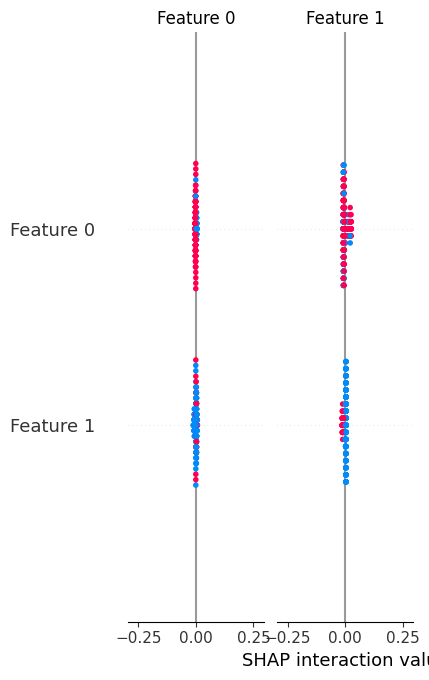

In [26]:
#Извлекаю в переменную шаги модели для обращения к ним
final_model = best_model.named_steps['models']

#Переменная с предобработ. данными X_test
X_test_transformed = X_test
for name, transform in best_model.steps[:-1]:
    if hasattr(transform, 'transform'):
        X_test_transformed = transform.transform(X_test_transformed)

#Анализ важности признаков
explainer = shap.KernelExplainer(final_model.predict_proba, X_test_transformed)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar")

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Вывод о значимости признаков</b>

- Признаки разрешающие уведомлять пользователя, ошибки сервиса и выручка текущего месяца мало значимы для модели

- Сильнее всего на покупательскую активность влияет количество просмотренных сраниц за визит, время потраченное на это в прошлом и популярные категории с их временем просмотра

- После оценки значимости, можем не учитывать незначительно влияющие на модель признаки. Вместо этого, сосредоточившись на просматриваемости страниц и потраченном на это времени  

</div>

# Шаг 8. Сегментация покупателей

In [27]:
#Создаю и немного предобрабатываю финальный датафрейм
df_final = pd.merge(df_file, df_mk_money_pivoted, on='id', suffixes=('', '_mk_money'))
df_final = pd.merge(df_final, df_time_pivoted, on='id', suffixes=('', '_time'))
df_final = pd.merge(df_final, df_money, on='id')

probabilities_col = ['тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'предыдущий_месяц', 'препредыдущий_месяц',
       'текущий_месяц', 'предыдущий_месяц_time', 'текущий_месяц_time']

probabilities = best_model.predict_proba(df_final[probabilities_col])
probabilities_df = pd.DataFrame(probabilities, columns=['прежний_уровень', 'снизится'])

df_final = pd.concat([df_final, probabilities_df], axis=1)
df_final = df_final[~df_final['id'].isin(inactive_buyers_drop)]
df_final = df_final.loc[df_final['текущий_месяц'] <= 10000]

### Фильтрация
<a id='12-bullet'></a>

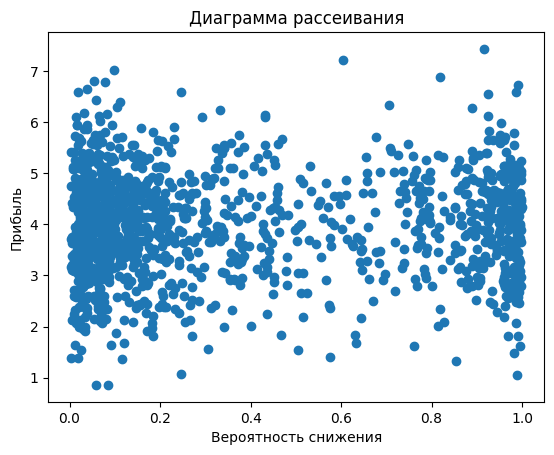

In [28]:
plt.scatter(df_final['снизится'], df_final['прибыль'])
plt.title('Диаграмма рассеивания')
plt.xlabel('Вероятность снижения')
plt.ylabel('Прибыль')
plt.show()

<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Выбор сегмента</b>

Рассмотрю сегмент покупателей с высокими доходами и высокой верояностью потерять прежнюю покупательскую активность (значения выше 80% на диаграмме), они представляют собой самую интересную категорию

</div>

In [29]:
#Разбивка на категории для пользователей с потенциалом понижения
def categorize(value):
    if value <  0.65:
        return 'низкая вероятность'
    elif value <  0.8:
        return 'средняя вероятность'
    else:
        return 'высокая вероятность'

df_final['снижение_пок_активности'] = df_final.apply(lambda row: categorize(row['снизится']), axis=1)

In [30]:
#df_final['разница_3_и_2_мес_выручки'] = df_final['препредыдущий_месяц'] - df_final['предыдущий_месяц']
#df_final['разница_2_и_тек_мес_выручки'] = df_final['предыдущий_месяц'] - df_final['текущий_месяц']

In [31]:
#Фильтр для изучения группы пользователей
df_study = df_final.loc[(df_final['прибыль'] > 4.7) &
                       (df_final['снижение_пок_активности'] == 'высокая вероятность')]

food_behavior = ['популярная_категория', 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал']

website_behavior = ['предыдущий_месяц_time', 'текущий_месяц_time',
                    'ошибка_сервиса']

### Визуализация и выводы
<a id='13-bullet'></a>

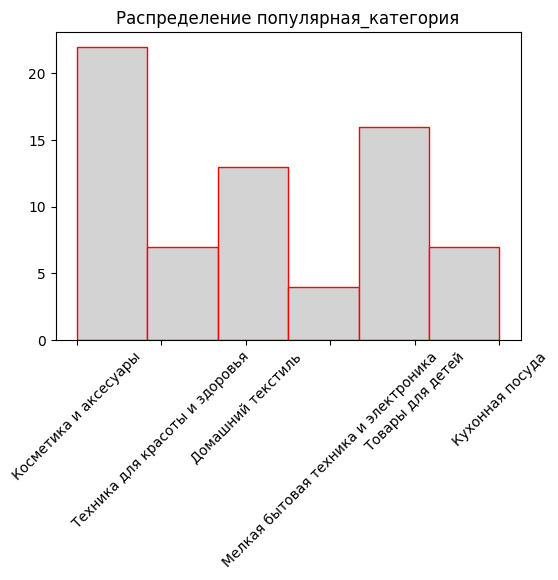

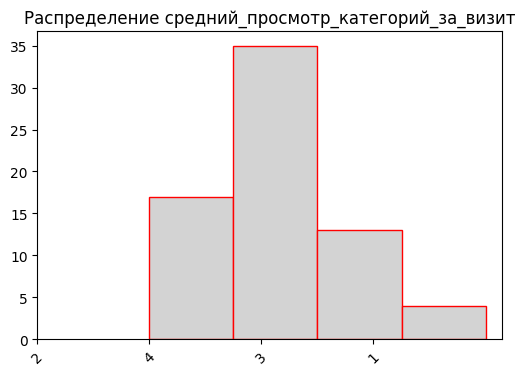

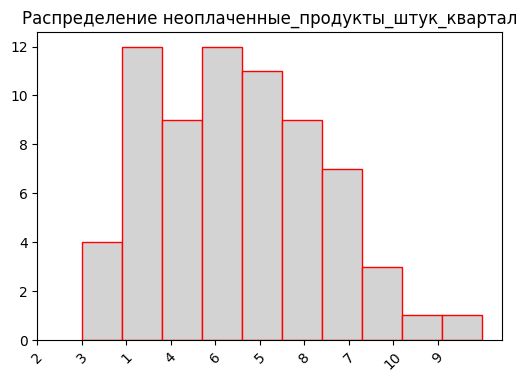

In [32]:
#Оценка 'продуктового поведения'
for sign in food_behavior:
    unique_values = df_study[sign].unique()
    num_bins = len(unique_values)

    plt.figure(figsize=(6,  4))
    plt.hist(df_study[sign], bins=num_bins, align='mid', edgecolor='red', color='lightgray')
    plt.xticks(range(num_bins), unique_values, rotation=45)
    plt.title(f'Распределение {sign}')
    plt.show()

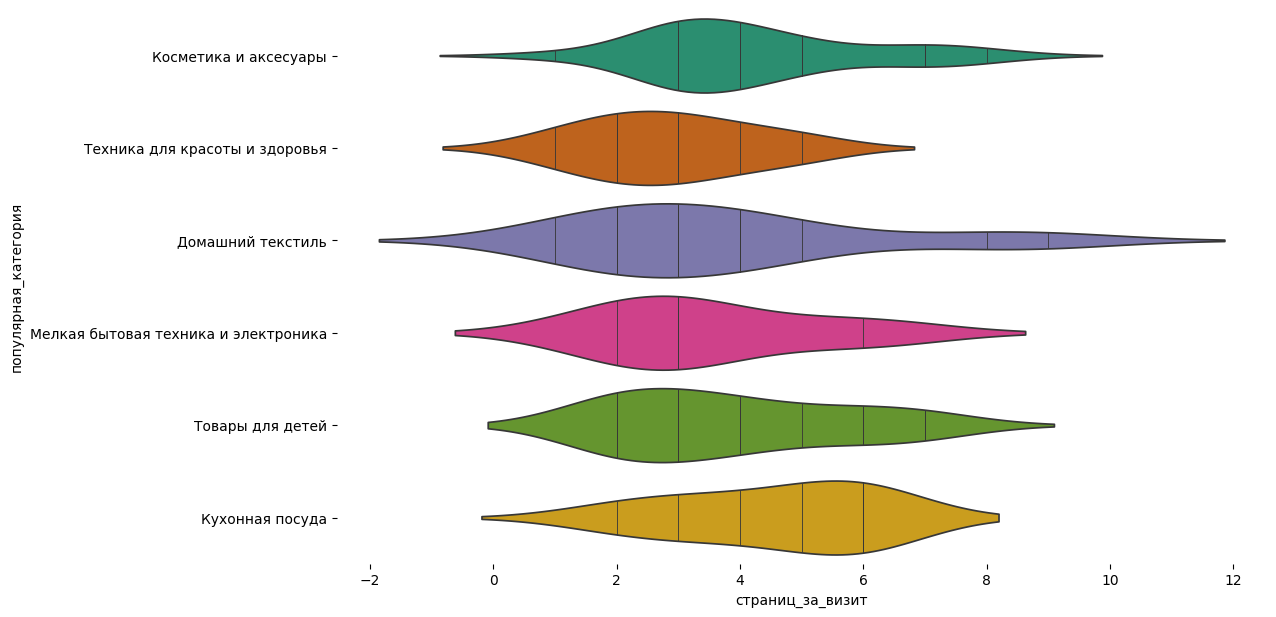

In [33]:
#Оценка кол-ва страниц относительно категорий
figsize = (12, 1.2 * len(df_study['популярная_категория'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_study, x='страниц_за_визит', y='популярная_категория', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

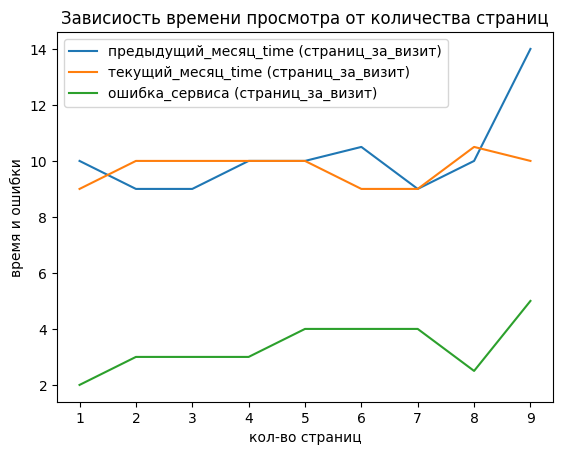

In [34]:
#Функция для оценки просматриваемости страниц
def plot_(df, be_col, gr_col, xlabel, ylabel, title):
    plt.figure()
    for behavior in be_col:
        viewing = df.groupby(gr_col)[behavior].median()
        plt.plot(viewing.index, viewing.values, label=f'{behavior} ({gr_col})')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

plot_(df_study, website_behavior, 'страниц_за_визит', 'кол-во страниц', 'время и ошибки',
                       'Зависиость времени просмотра от количества страниц')

count    1296.000000
mean     5238.096065
std       834.318717
min      2758.700000
25%      4706.050000
50%      5179.950000
75%      5759.275000
max      7799.400000
Name: текущий_месяц, dtype: float64
count    1296.000000
mean     4947.468750
std       700.797239
min      2890.000000
25%      4498.125000
50%      5005.500000
75%      5405.625000
max      6869.500000
Name: предыдущий_месяц, dtype: float64


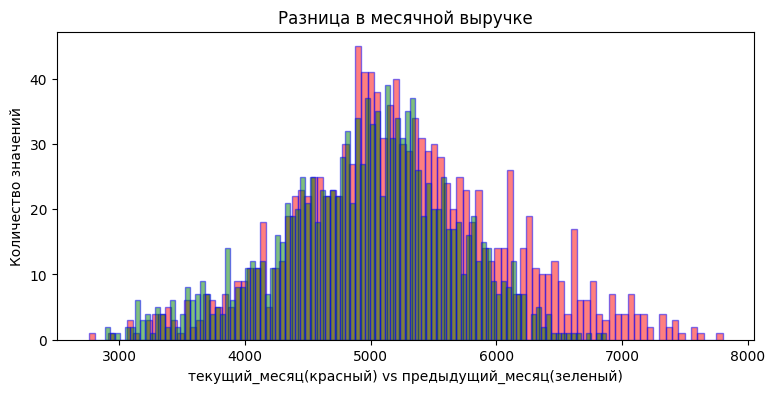

In [35]:
#Оценка ежемесячной выручки
def viz_mount(df, mount1, mount2):
    print(df[mount1].describe())
    print(df[mount2].describe())

    plt.figure(figsize=(9,  4))
    plt.hist(df[mount1], alpha=0.5, color='red', edgecolor='blue', bins=100)
    plt.hist(df[mount2], alpha=0.5, color='green', edgecolor='blue', bins=100)
    plt.title('Разница в месячной выручке')
    plt.xlabel(f'{mount1}(красный) vs {mount2}(зеленый)')
    plt.ylabel('Количество значений')
    plt.show()

viz_mount(df_final, 'текущий_месяц', 'предыдущий_месяц')


count    1296.000000
mean     5238.096065
std       834.318717
min      2758.700000
25%      4706.050000
50%      5179.950000
75%      5759.275000
max      7799.400000
Name: текущий_месяц, dtype: float64
count    1296.000000
mean     4836.202160
std       333.514091
min      4098.000000
25%      4584.500000
50%      4810.500000
75%      5056.000000
max      5663.000000
Name: препредыдущий_месяц, dtype: float64


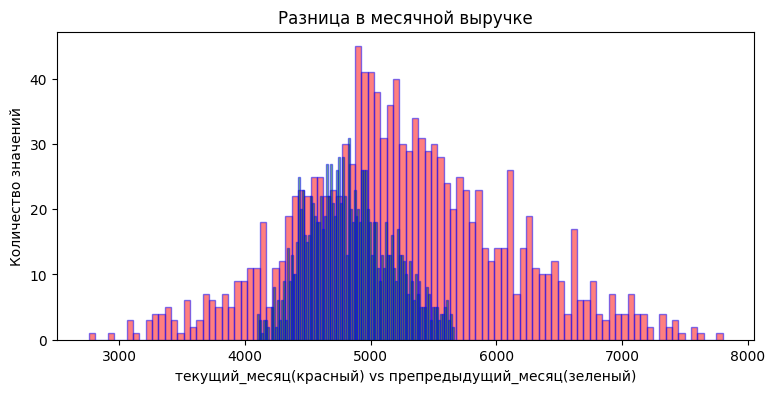

In [36]:
viz_mount(df_final, 'текущий_месяц', 'препредыдущий_месяц')

<b>Выводы</b>

- Детские товары и косметика пользуются самым большим спросом, но пользователи не так уж много страниц просматривают интересуясь данными категориями, лидеры в просмотрах за визит посуда и текстиль

- В среднем около 4-6 продуктов ежеквартально остаются неоплаченными

- Ошибки со стороны сервиса не особо отталкивают пользователей

- Пользователи в текущем месяце проводят меньше времени на сайте при изучении большого количества страниц

- Выручка в последние 3 месяца почти не менялась, только 3 месяца назад разброс минимальных и максимальных значений был меньше



<b>Предложения</b>

- Напоминать о товарах в корзине, делать на них, и на их базе скидочные и акционные предложения

- Упростить поиск в категориях товаров с высоким количеством просматриваемых страниц, делая скидочные или выгодные предложения по узкому пулу позиций (допустим в поиске посуды можно достатончо долго искать нужное, сравнивая расцветки или характеристики, но когда из всего многообразия етсь 3-4 "выгодные" позиции, это может помочь принять решение быстрее и с большей вероятностью)

- Зная средний ежемесячный показатель покупок постоянного пользователя, делать выгодное предложение в начале месяца (желательно в повсеместные зарплатные дни), и мониторя его активность подогревать новыми, снижая маркетинговую активность при приближении к базовым показателям доходности

# Шаг 9. Общий вывод

<b>Выполняемая задача</b>

Изучить покупательскую активность пользователей интернет магазина и разработать пердложения по увеличению конверсии

<b>Действия по предобработке и исследованию</b>

- Произведена подготовка данных к анализу и обучению моделец

- Промаркирован уровень финансовой активности постоянных покупателей.

- Построена модель (векторная модель с линейным ядром), предсказывающая вероятность снижения покупательской активности клиента

- Используя данные модели и данные о прибыльности клиентов, выделены сегменты покупателей и разработаны для них персонализированные предложения.